In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import scipy.stats as st

In [3]:
df=pd.read_excel('C:\\Users\\Lenovo\\Desktop\\PHBS\\研三\\Thesis\\NUS Thesis\\sh300.xlsx',index_col='date')

In [7]:
daily_return=np.log(df['Close']).diff().dropna()

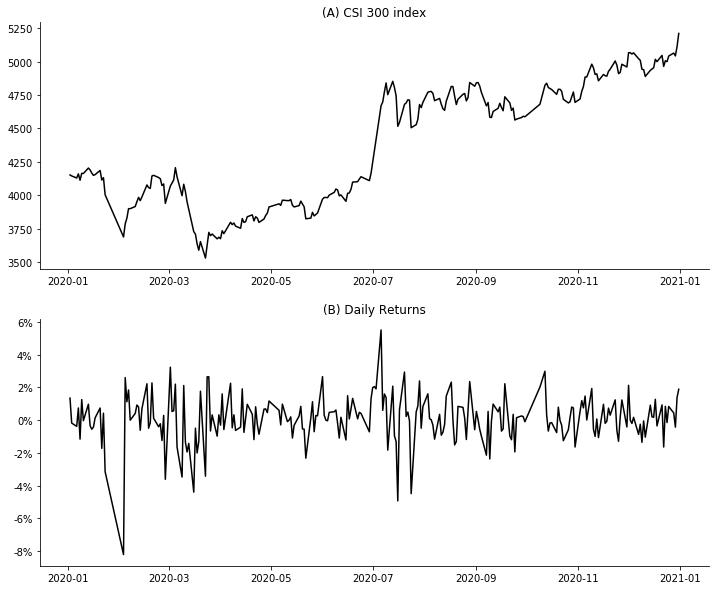

In [27]:
fig,ax=plt.subplots(2,1,figsize=(12, 10))

ax[0].plot(df['Close'].loc['2020'].index,df['Close'].loc['2020'],color='k')
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)
ax[0].set_title('(A) CSI 300 index')

ax[1].plot(daily_return.loc['2020'].index,daily_return.loc['2020'],color='k')
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
ax[1].set_title('(B) Daily Returns')

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.show()

fig.savefig('C:\\Users\\Lenovo\\Desktop\\PHBS\\研三\\Thesis\\NUS Thesis\\figures\\CSI 300 index in 2020.pdf',bb_inches='tight')

In [32]:
min_value=daily_return.loc['2020'].min()

In [35]:
index=daily_return<min_value
daily_return[index]

date
2007-02-27   -0.096949
2008-06-10   -0.084560
2015-07-27   -0.089502
2015-08-24   -0.091542
Name: Close, dtype: float64

In [40]:
max_value=daily_return.loc['2020'].max()

In [42]:
index=daily_return>max_value
daily_return[index]

date
2005-06-08    0.078628
2008-02-04    0.079474
2008-04-24    0.088815
2008-08-20    0.075616
2008-09-19    0.089310
2008-09-22    0.062861
2008-11-10    0.071212
2008-11-19    0.059783
2009-03-04    0.064619
2015-06-30    0.064989
2015-07-09    0.062075
2015-08-27    0.057771
2019-02-25    0.057775
Name: Close, dtype: float64

In [43]:
daily_return.resample('Y').apply(lambda x:x.max()-x.min())

date
2005-12-31    0.113153
2006-12-31    0.102805
2007-12-31    0.151387
2008-12-31    0.173870
2009-12-31    0.138333
2010-12-31    0.101274
2011-12-31    0.074453
2012-12-31    0.078029
2013-12-31    0.110268
2014-12-31    0.090980
2015-12-31    0.156531
2016-12-31    0.113132
2017-12-31    0.047854
2018-12-31    0.091442
2019-12-31    0.117967
2020-12-31    0.137219
Freq: A-DEC, Name: Close, dtype: float64

In [63]:
def plot_with_sample_para(data,plot_ax,bin_num=50,normal_flag=1,degree_free=1,linestyle='-',color='b',label='Normal Dist'):
    """
    Draw a normal plot or log-normal plot based on the shape of data
    
    Parameters
    ----------
    data : np.array
    bin_num : int
    normal_flag : 1 or 2
        1 for normal distribution, 2 for log-normal distribution, 3 for student-t distribution
    plot_ax: the ax for plotting

    Returns
    -------
    None
    """    
    if normal_flag==1:  # if the data is subject to normal distribution
        nrv = st.norm(loc=data.mean(), scale=data.std())
    elif normal_flag==2:  # if the data is subject to log-normal distribution
        nrv=st.lognorm(s=np.log(data).std(), loc=0, scale=np.exp(np.log(data).mean()))
    else:  # if the data is subject to student-t distribution
        nrv=st.t(loc=data.mean(),scale=data.std(),df=degree_free)
        
    x_arr=np.linspace(data.min(),data.max(),bin_num+1)
    para_dist=np.diff(nrv.cdf(x_arr))*len(data)
    interval=x_arr[1]-x_arr[0]
    #plot_ax.hist(data, bins=bin_num)
    plot_ax.plot(x_arr[:-1]+0.5*interval,para_dist,linestyle=linestyle,label=label)
    return None

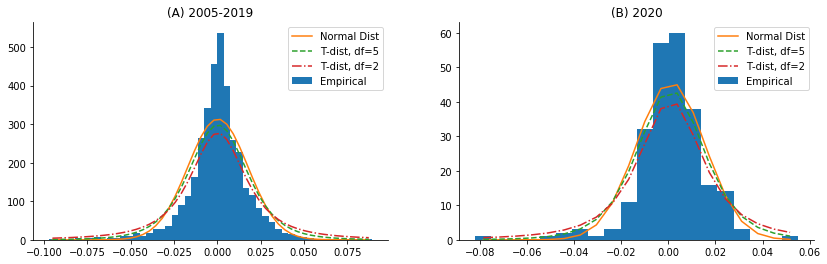

In [72]:
fig,ax=plt.subplots(1,2,figsize=(14, 4))

ax[0].hist(daily_return.loc[:'2019'],bins=50,label='Empirical')
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)
plot_with_sample_para(daily_return.loc[:'2019'],plot_ax=ax[0],bin_num=50,normal_flag=1)
plot_with_sample_para(daily_return.loc[:'2019'],plot_ax=ax[0],bin_num=50,normal_flag=3,degree_free=5,linestyle='--',label='T-dist, df=5')
plot_with_sample_para(daily_return.loc[:'2019'],plot_ax=ax[0],bin_num=50,normal_flag=3,degree_free=2,linestyle='-.',label='T-dist, df=2')
ax[0].legend()
ax[0].set_title('(A) 2005-2019')

ax[1].hist(daily_return.loc['2020'],bins=20,label='Empirical')
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
ax[1].set_title('(B) 2020')
plot_with_sample_para(daily_return.loc['2020'],plot_ax=ax[1],bin_num=20,normal_flag=1)
plot_with_sample_para(daily_return.loc['2020'],plot_ax=ax[1],bin_num=20,normal_flag=3,degree_free=5,linestyle='--',label='T-dist, df=5')
plot_with_sample_para(daily_return.loc['2020'],plot_ax=ax[1],bin_num=20,normal_flag=3,degree_free=2,linestyle='-.',label='T-dist, df=2')
ax[1].legend()

plt.show()

fig.savefig('C:\\Users\\Lenovo\\Desktop\\PHBS\\研三\\Thesis\\NUS Thesis\\figures\\Empirical Distribution of Daily Returns.pdf',bb_inches='tight')